### Machine Learning Project On Dry Bean Classification

#### OBJECTIVE
##### To predict the dry bean variety using a machine learning model

#### About Dataset
##### The dataset collected fron UCI Machine Learning Repository represents a classification problem, which focuses on developing a supervised machine learning model predicting the variety of dry bean. A total of seven different dry bean categories belong to SEKER, BARBUNYA, BOMBAY, CALI, DERMASON, HOROZ and SIRA are used in the research.

##### The dataset consists of 13611 instances(samples) and 16 features collected from bean images obtained by computer vision system were subjected to segmentation and future extraction stages.

##### The primary objective of this project is to build an accurate and dependable machine learning model capable of predicting the variety of dry beans. To achieve this, we will employ a suitable classification algorithm. The dataset includes 17 features in total: 16 independent numerical features and a target variable indicating the dry bean variety category.

In [3]:
# loading necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import scipy.stats as stat
import pylab
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
# loading the dataset

dataset=pd.read_excel('Dry_Bean_Dataset.xlsx')


In [5]:
dataset.shape

(13611, 17)

##### The dataset consist of 13611 rows and 17 columns.

In [6]:
dataset.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [7]:
dataset.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [8]:
# identify the dtype of features
dataset.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [9]:
# acessing the information stored in each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [10]:
# idenfying the null value if there any
dataset.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

##### The dataset contain no null values. So there is no need to use fillna() or dropna() methods here.

In [11]:
# descriptive statistics
dataset.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


##### This table presents the descriptive statistics of the dataset, including the mean, median, maximum, minimum, 25th percentile, and 75th percentile for each numerical feature.

In [3]:
# identifying the duplicated rows
dataset.duplicated().sum()

68

In [5]:
# there 68 duplicated rows in the dataset, we are dropping all those duplicated rows
dataset_new=dataset.drop_duplicates()
dataset_new.reset_index(drop=True)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13539,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13540,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13541,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


##### There were 68 duplicated rows in the dataset, removed all of them using drop_duplicates() method and the then reset the index using reset_index() method.

In [6]:
# seperating numerical features
numerical_features=[feature for feature in dataset_new.columns if dataset_new[feature].dtype!="O"]
numerical_features

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4']

##### Identified the 16 numerical features and one categorical feature present in the dataset.

In [7]:
categorical_features=[feature for feature in dataset_new.columns if feature not in numerical_features]
categorical_features

['Class']

Text(0, 0.5, 'count')

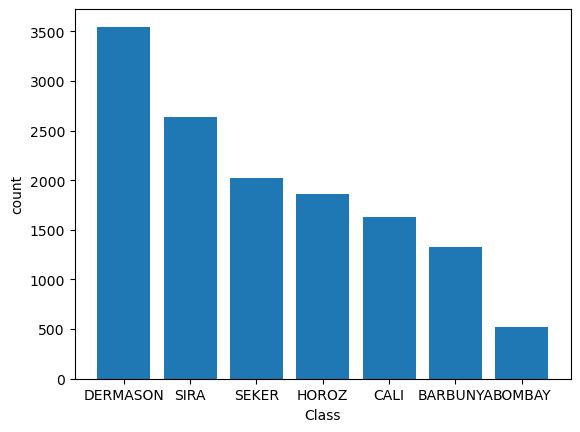

In [7]:
#bar plot for categorical feature which is also the target variable

plt.bar(dataset_new['Class'].value_counts().index,dataset_new['Class'].value_counts())
plt.xlabel('Class')
plt.ylabel('count')

##### Used a bar plot to visualize the count of occurence of each dry bean category present in the dataset. From the above bar plot it is visible that DERMASON is the most frequent category followed by SIRA, SEKER, HOROZ, CALI, BARBUNYA and BOMBAY.

In [25]:
dataset_new['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [7]:
# verifying if there is any discrete features
for feature in numerical_features:
    print(f'Number of unique values in,{feature}: {dataset_new[feature].nunique()}')
 

Number of unique values in,Area: 12011
Number of unique values in,Perimeter: 13416
Number of unique values in,MajorAxisLength: 13543
Number of unique values in,MinorAxisLength: 13543
Number of unique values in,AspectRation: 13543
Number of unique values in,Eccentricity: 13543
Number of unique values in,ConvexArea: 12066
Number of unique values in,EquivDiameter: 12011
Number of unique values in,Extent: 13535
Number of unique values in,Solidity: 13526
Number of unique values in,roundness: 13543
Number of unique values in,Compactness: 13543
Number of unique values in,ShapeFactor1: 13543
Number of unique values in,ShapeFactor2: 13543
Number of unique values in,ShapeFactor3: 13543
Number of unique values in,ShapeFactor4: 13543


#### Here it is visible that no numerical feature has unique values less than 25, so considering all of them as continuous features.

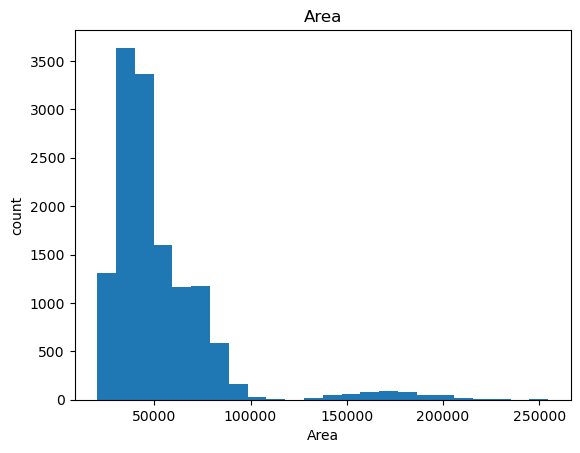

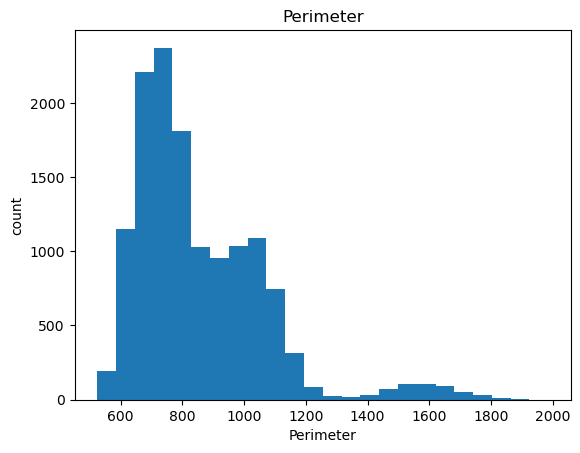

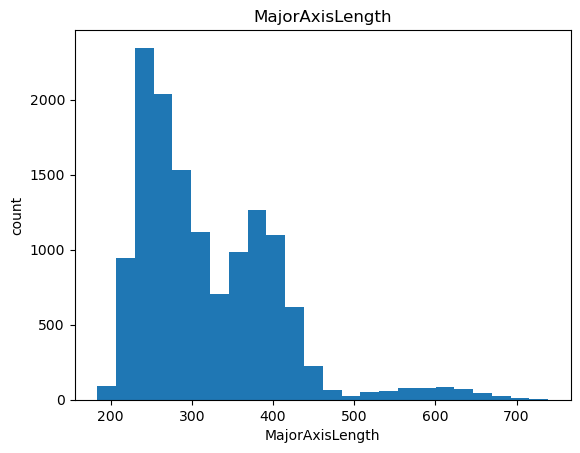

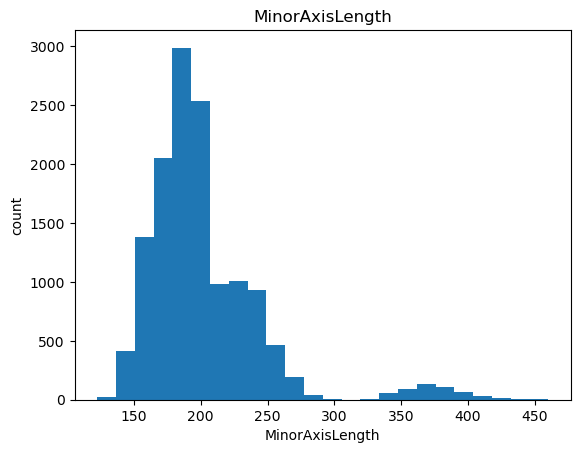

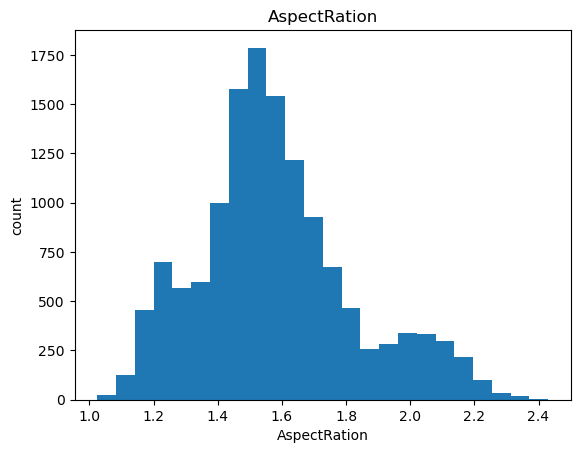

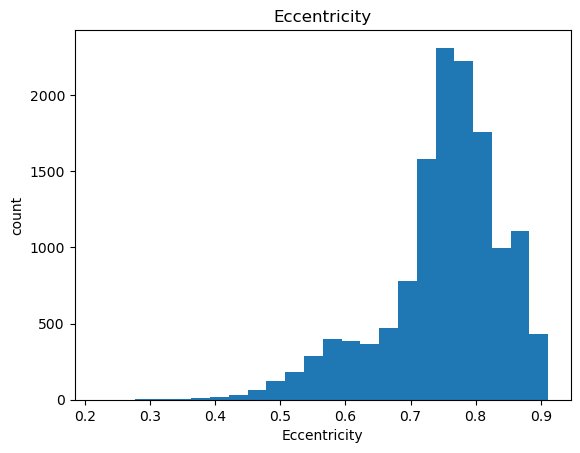

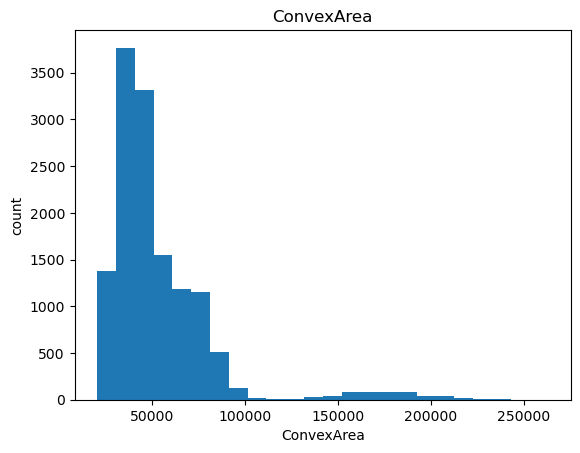

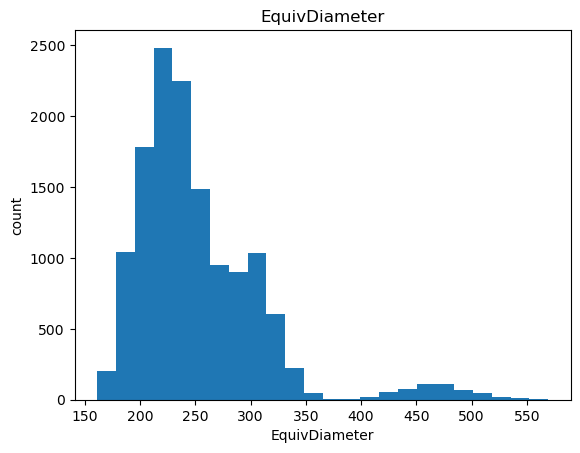

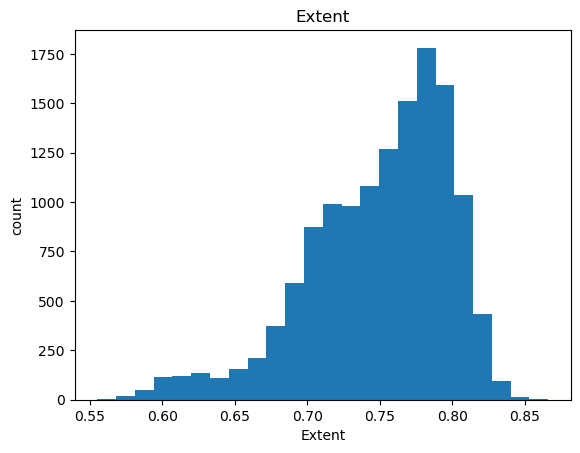

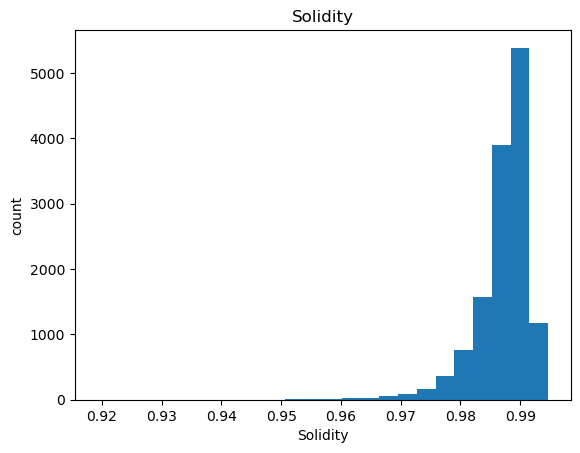

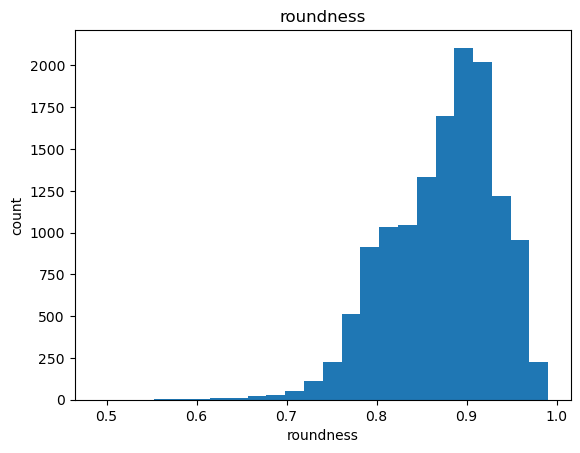

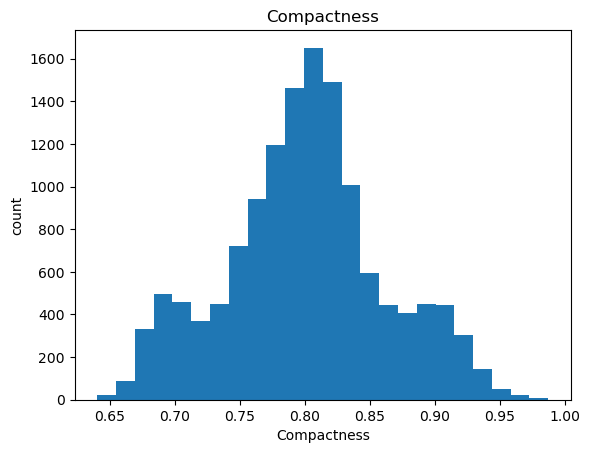

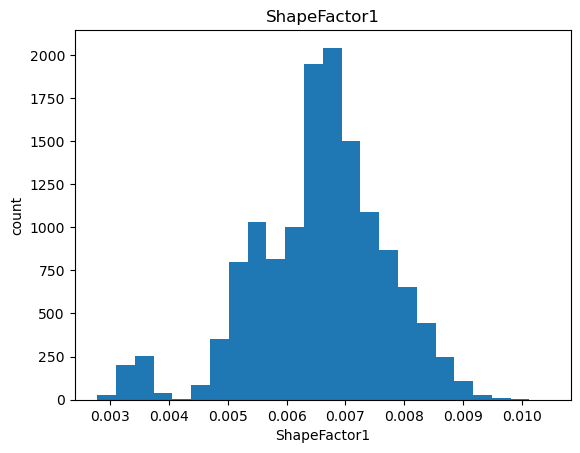

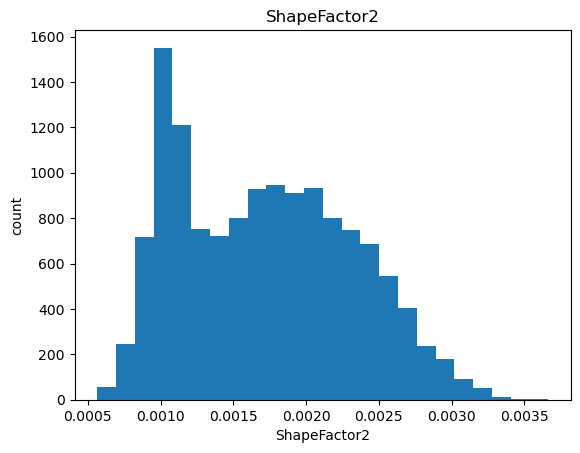

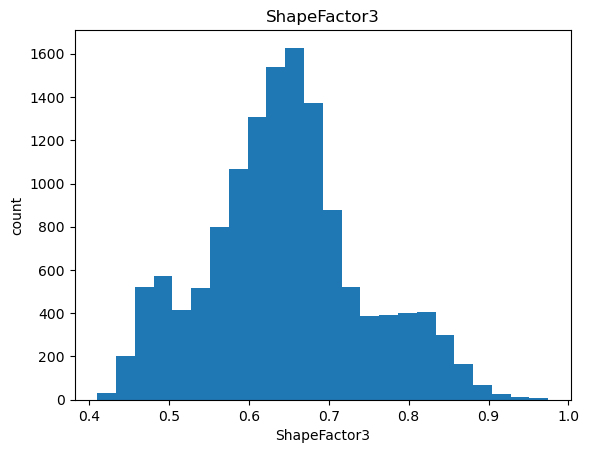

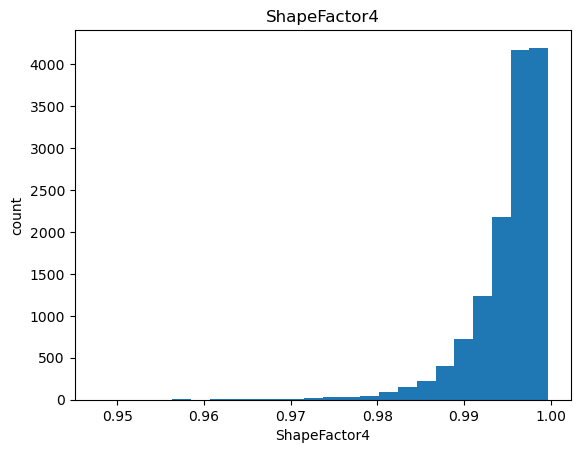

In [7]:
# analysing the continous features by plotting histograms

for feature in numerical_features:
    data= dataset_new.copy()
    plt.hist(data[feature],bins=24)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

##### from the above graphs it is visible that all of the continous features in the dataset are skewed. So we need to handle the variables by applying necessary transformation techniques.

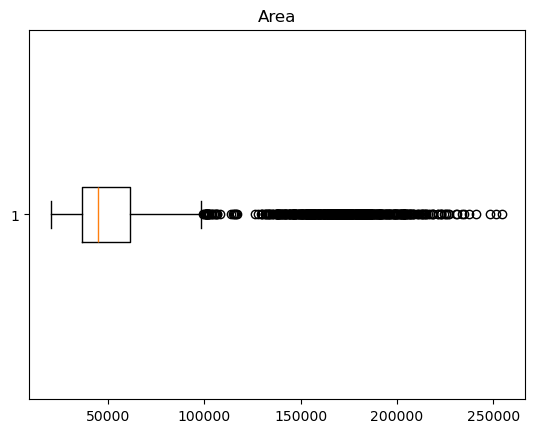

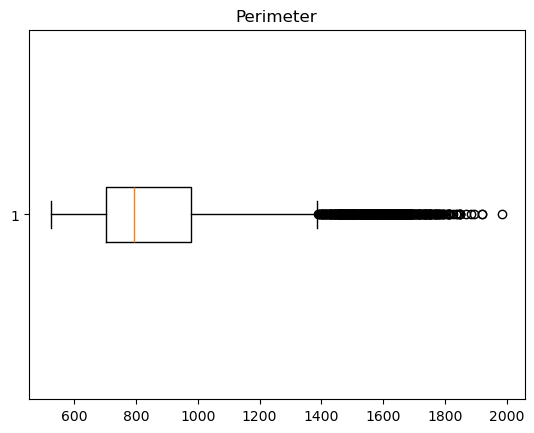

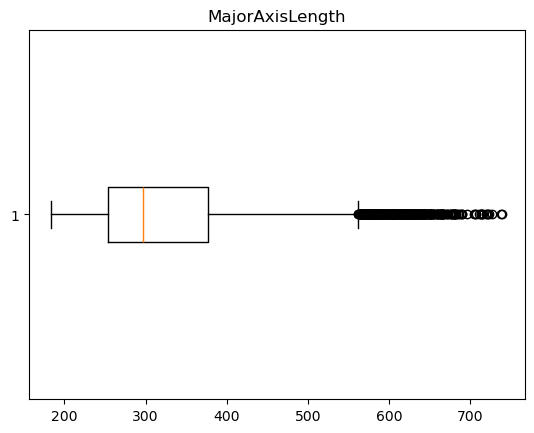

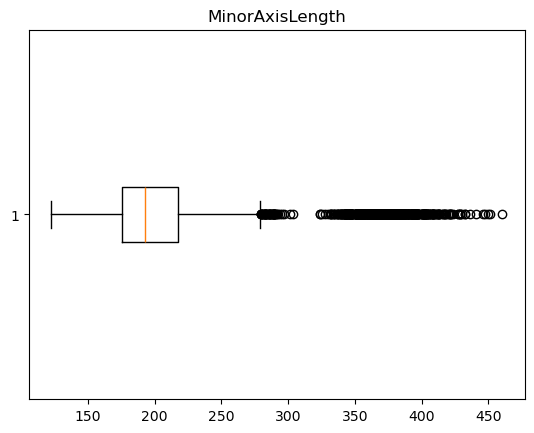

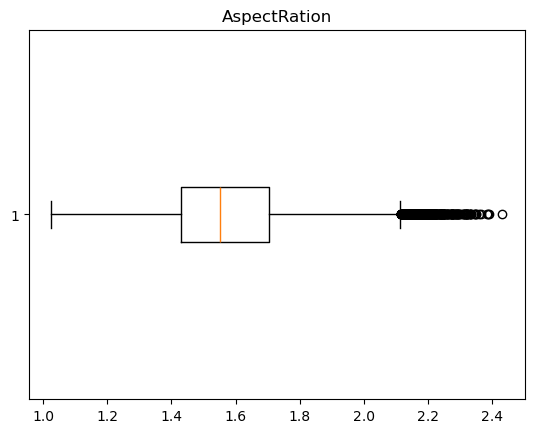

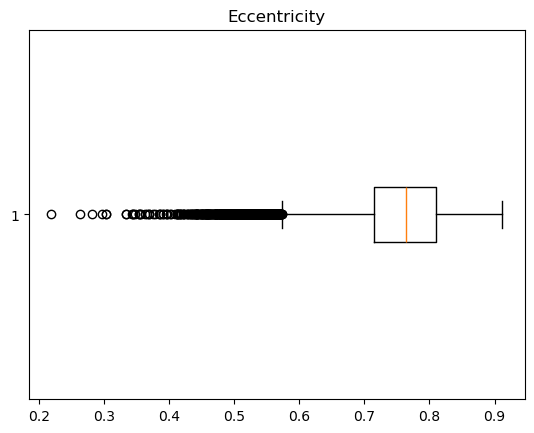

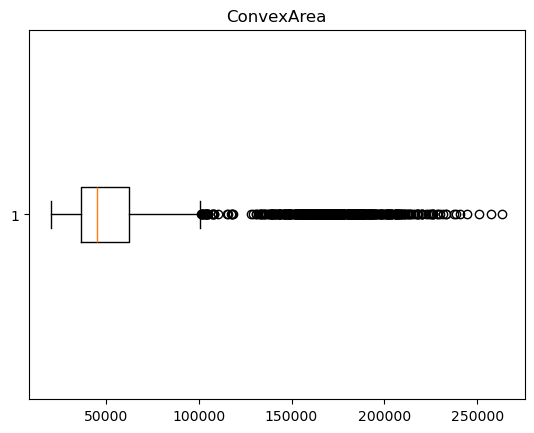

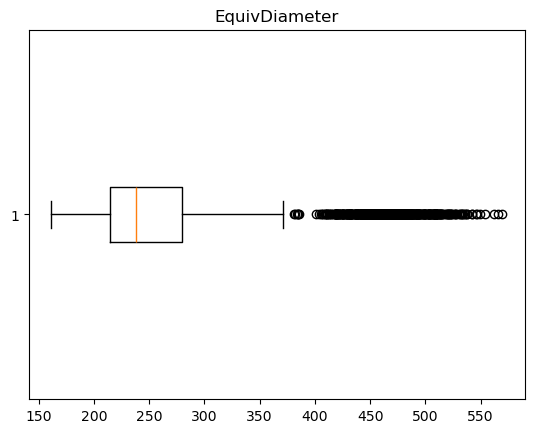

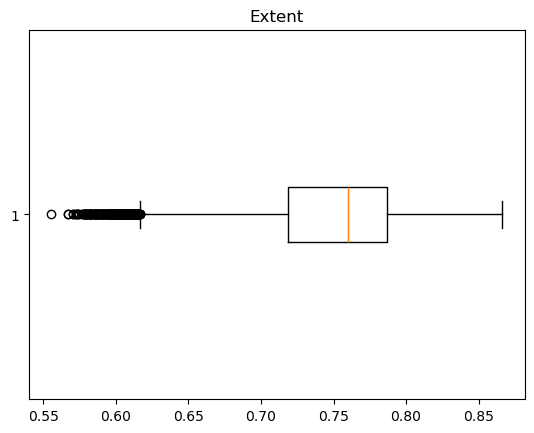

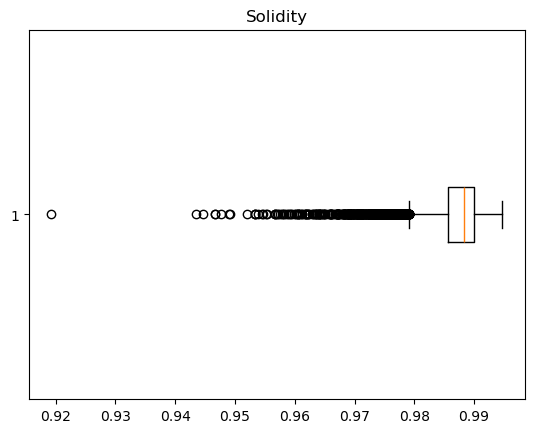

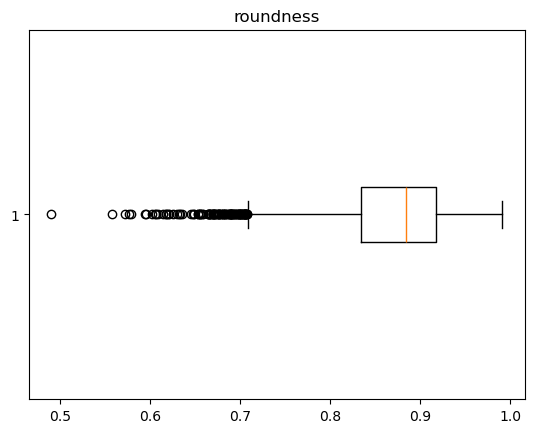

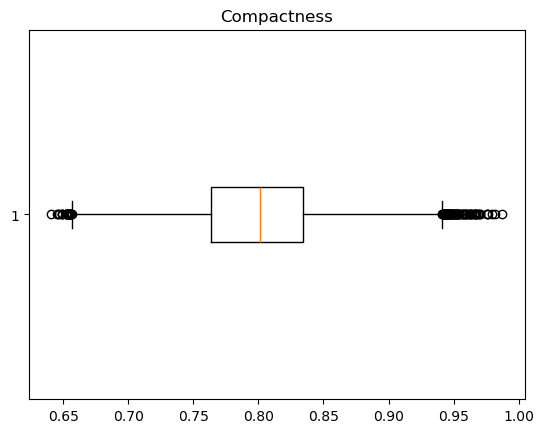

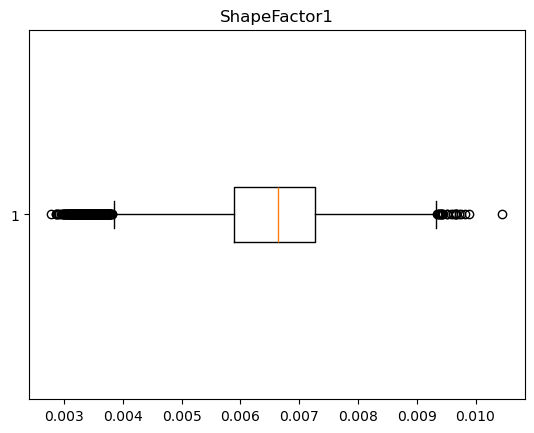

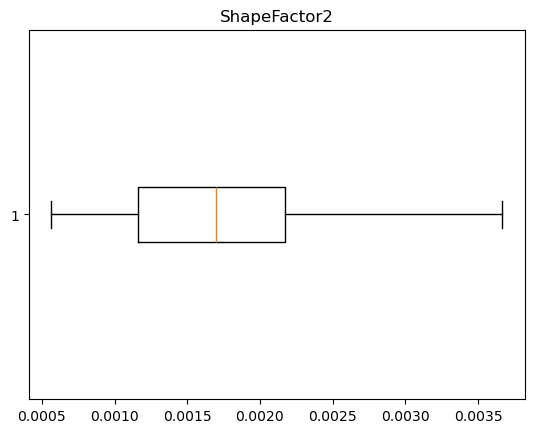

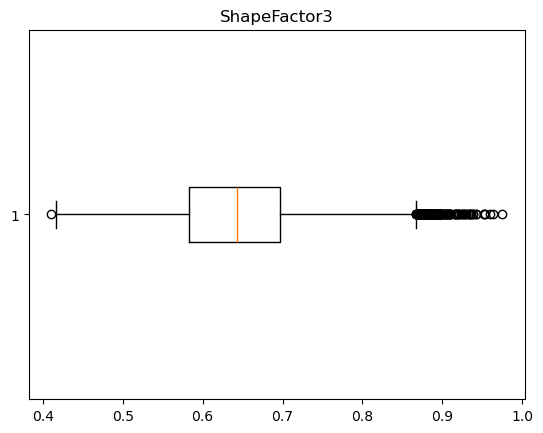

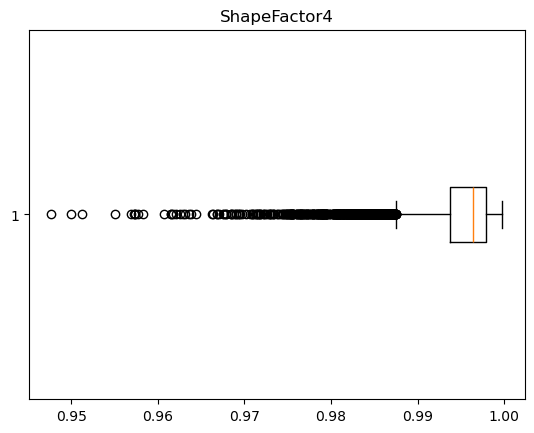

In [8]:
# detecting out liers using boxplot

for feature in numerical_features:
    data=dataset_new.copy()
    plt.boxplot(data[feature],vert=False)
    plt.title(feature)
    plt.show()

##### Detected the outlier presnt in the dataset and handled it using inter quartile range.

In [8]:
# handling outliers using inter quartile range

for feature in numerical_features:
    Q1=dataset_new[feature].quantile(0.25)
    Q3=dataset_new[feature].quantile(0.75)
    IQR=Q3-Q1
    lowerLimit=Q1-(1.5*IQR)
    upperLimit=Q3+(1.5*IQR)
    dataset_new.loc[(dataset_new[feature]<lowerLimit),feature]=lowerLimit
    dataset_new.loc[(dataset_new[feature]>upperLimit),feature]=upperLimit

C:\Users\anjan\AppData\Local\Temp\ipykernel_2748\1346710844.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1366.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset_new.loc[(dataset_new[feature]<lowerLimit),feature]=lowerLimit
C:\Users\anjan\AppData\Local\Temp\ipykernel_2748\1346710844.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1857.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset_new.loc[(dataset_new[feature]<lowerLimit),feature]=lowerLimit


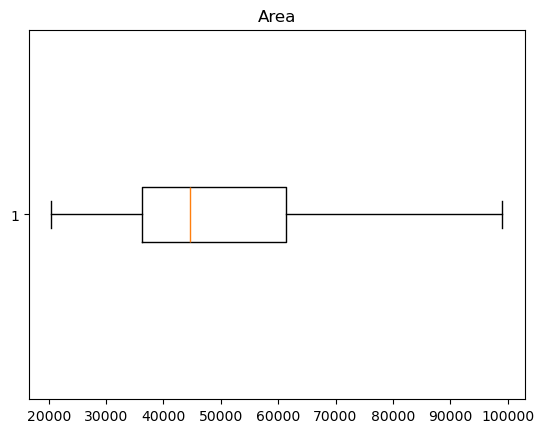

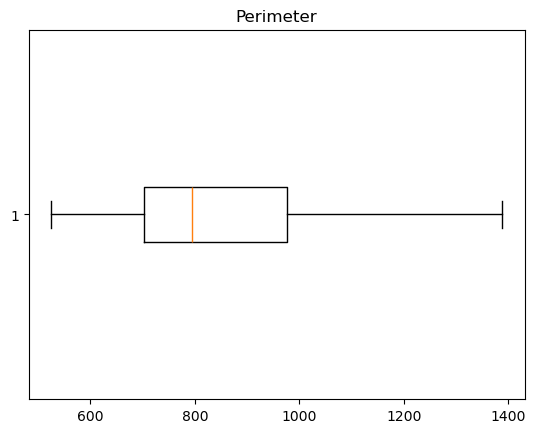

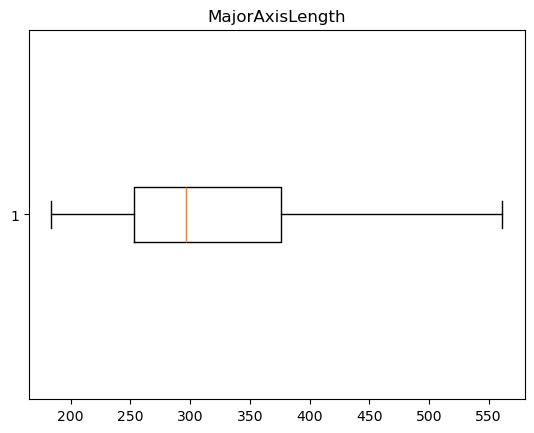

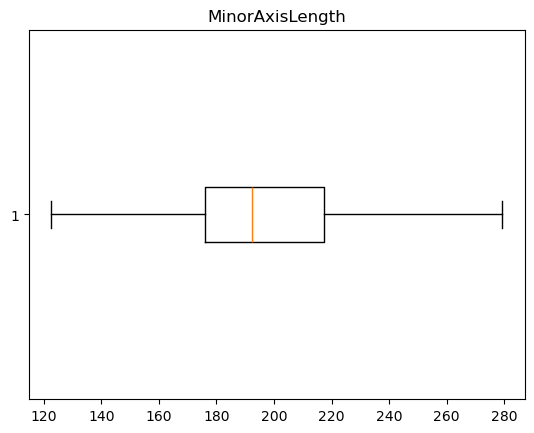

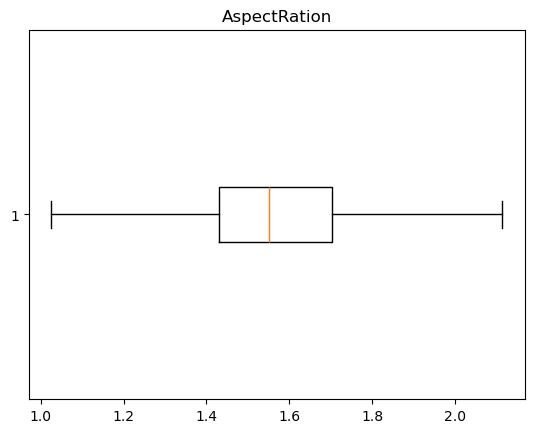

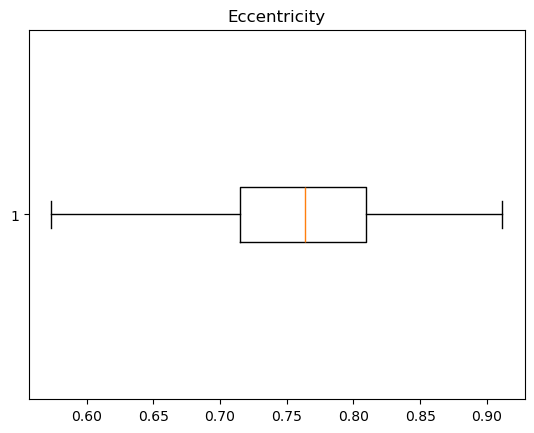

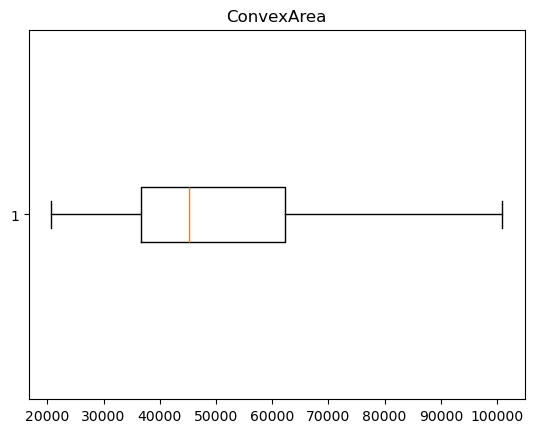

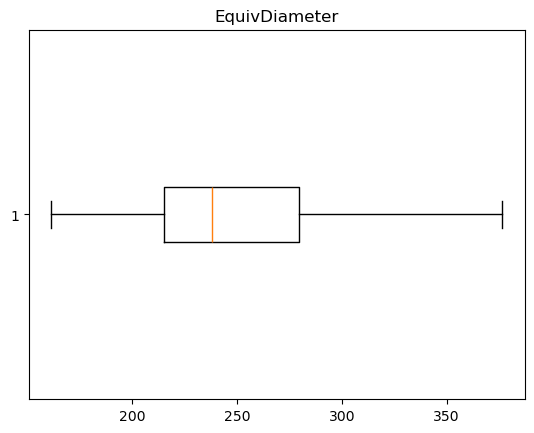

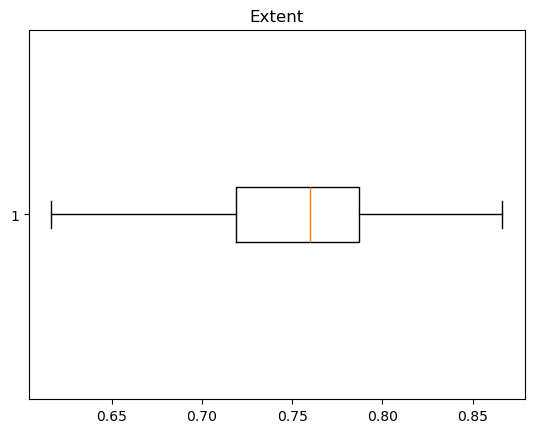

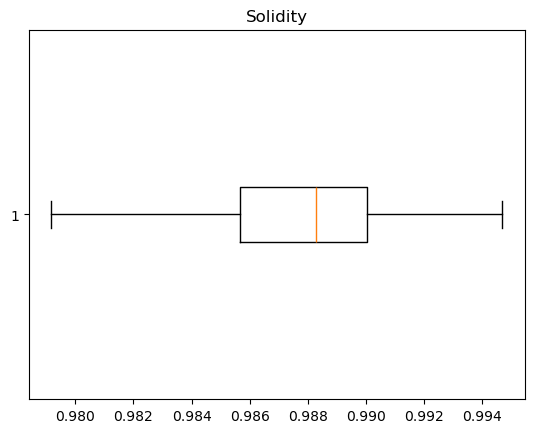

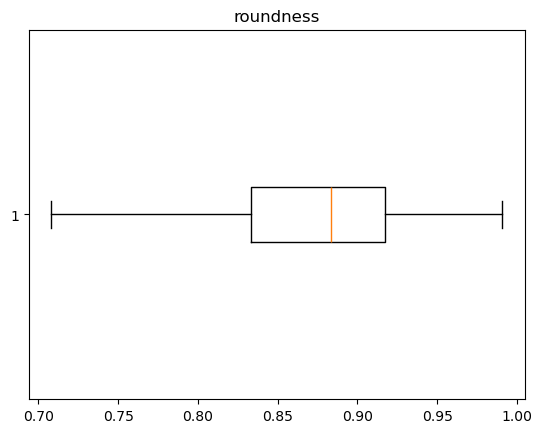

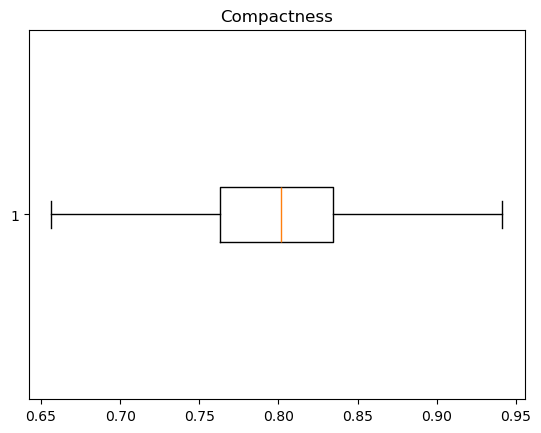

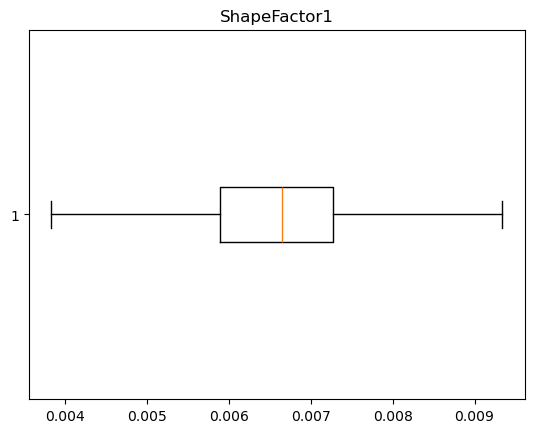

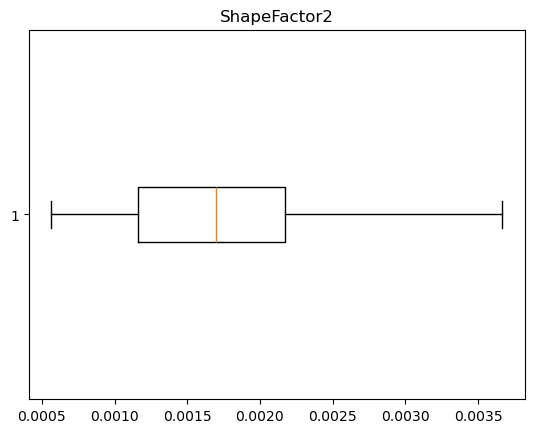

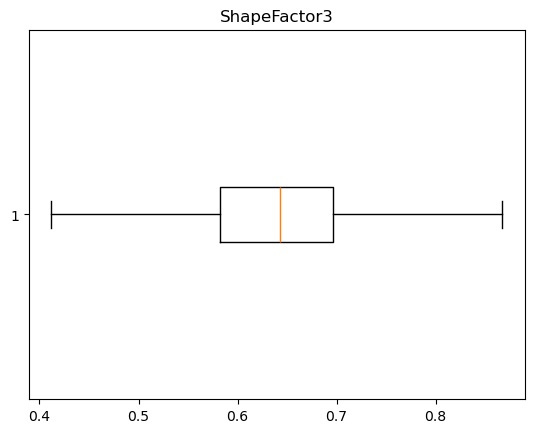

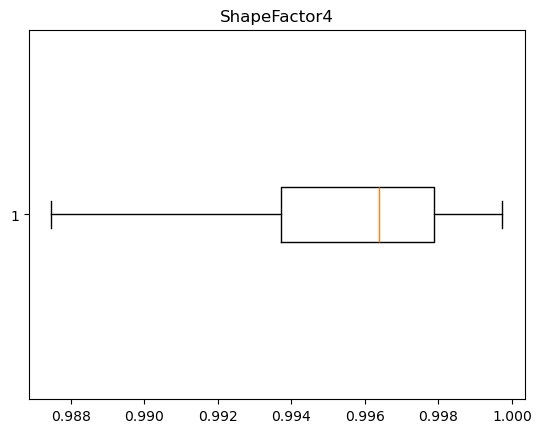

In [8]:
for feature in numerical_features:
    data=dataset_new.copy()
    plt.boxplot(data[feature],vert=False)
    plt.title(feature)
    plt.show()

In [8]:
dataset_new.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,50166.946596,847.327668,318.313622,198.672454,1.578523,0.753644,50869.022632,249.468930,0.750157,0.987462,0.873981,0.800277,0.006576,0.001719,0.643986,0.995371
std,18864.234044,189.355524,80.411533,32.834541,0.238992,0.083136,19253.933149,47.507996,0.047951,0.003572,0.058310,0.061237,0.001088,0.000595,0.097765,0.003286
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.573352,20684.000000,161.243764,0.616565,0.979168,0.707977,0.656365,0.003827,0.000564,0.411782,0.987463
25%,36282.500000,703.230000,253.086806,175.886357,1.430662,0.715144,36673.000000,214.933277,0.718735,0.985678,0.833410,0.763228,0.005893,0.001158,0.582517,0.993720
50%,44580.000000,793.896000,296.404589,192.491117,1.549860,0.763997,45122.000000,238.245711,0.759903,0.988288,0.883490,0.801514,0.006643,0.001700,0.642424,0.996393
75%,61382.000000,977.146500,376.312489,217.245403,1.703916,0.809671,62360.000000,279.560351,0.786849,0.990019,0.917031,0.834470,0.007270,0.002173,0.696341,0.997891
max,99031.250000,1388.021250,561.151012,279.283973,2.113797,0.911423,100890.500000,376.500961,0.866195,0.994677,0.990685,0.941333,0.009336,0.003665,0.867076,0.999733


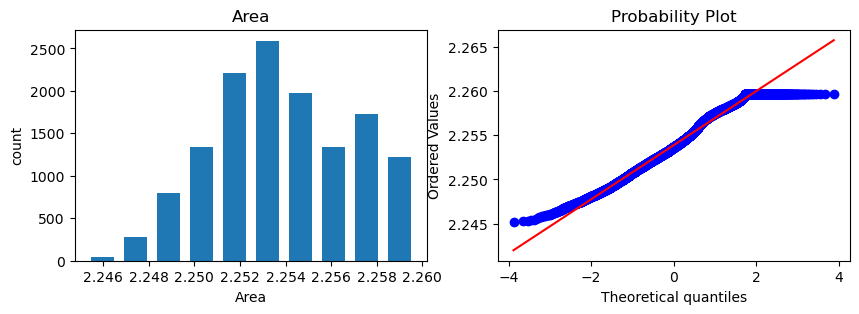

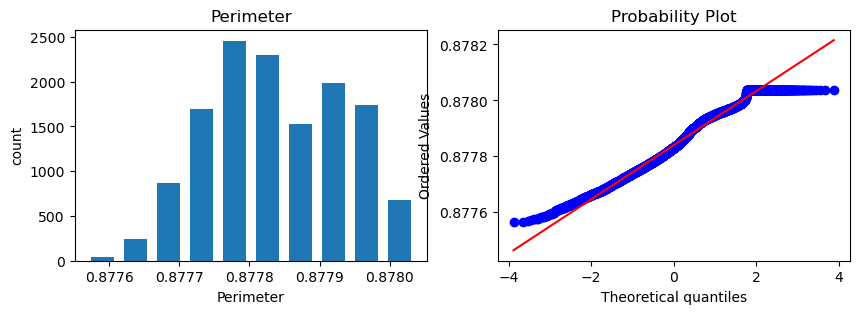

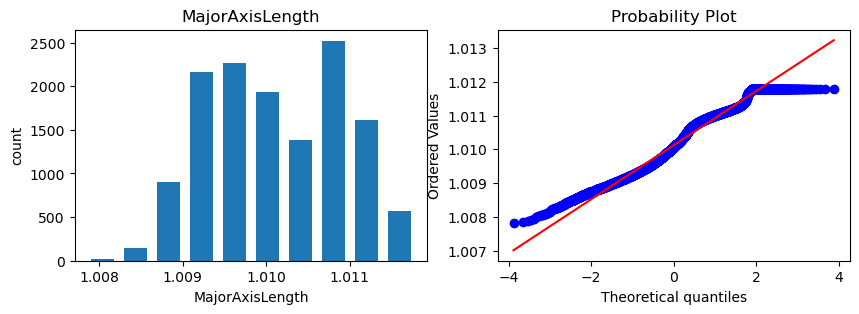

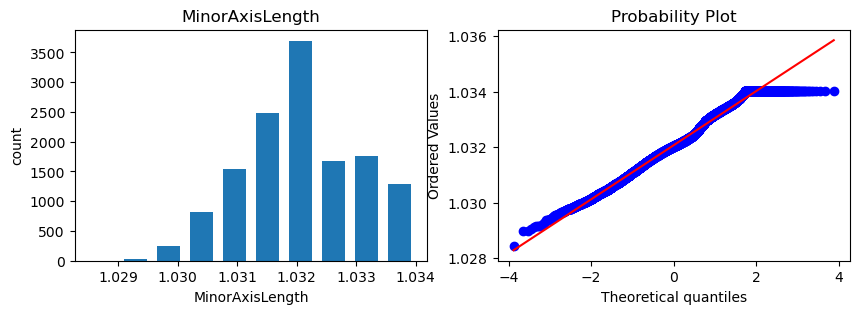

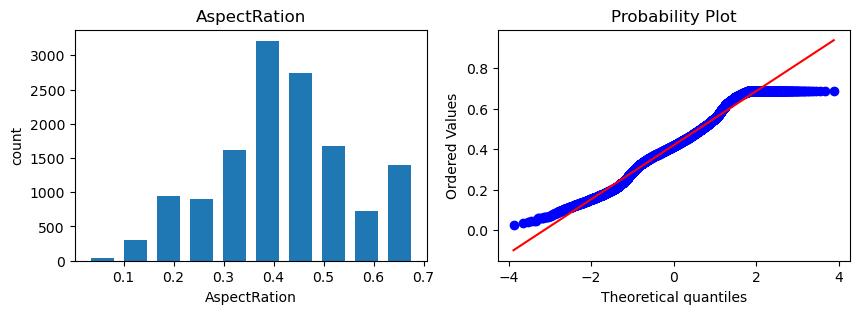

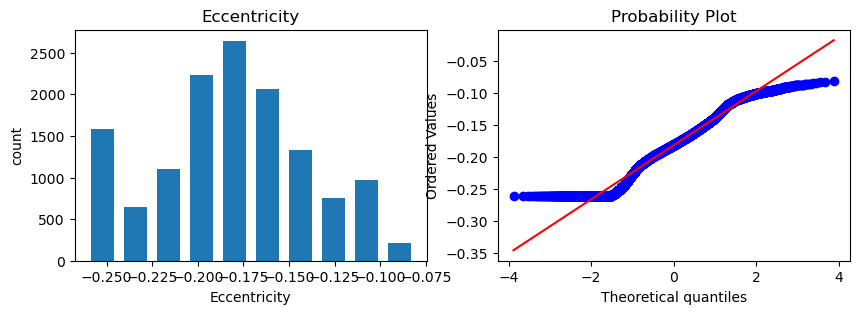

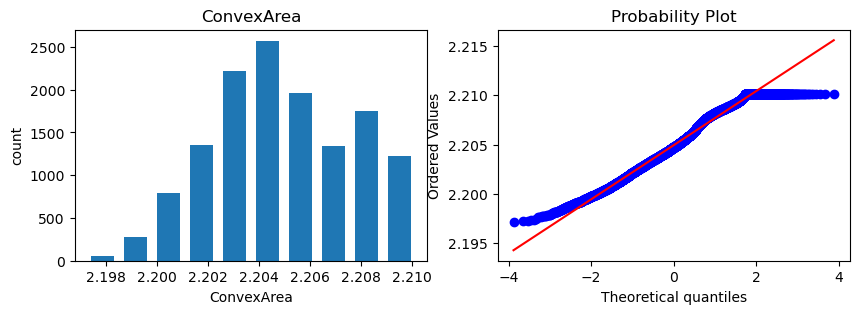

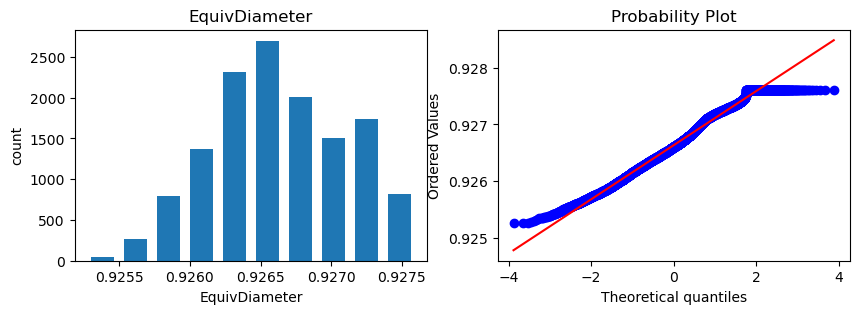

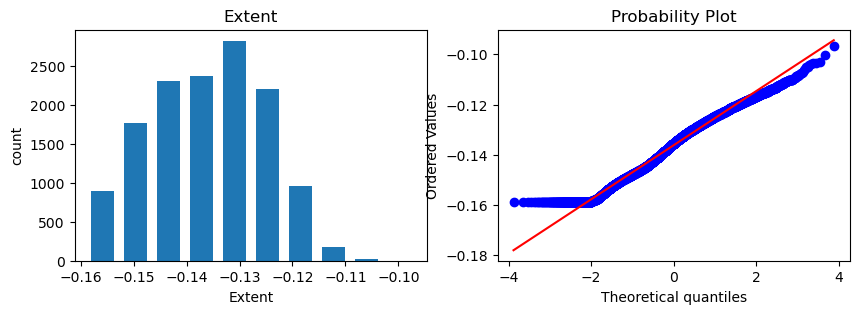

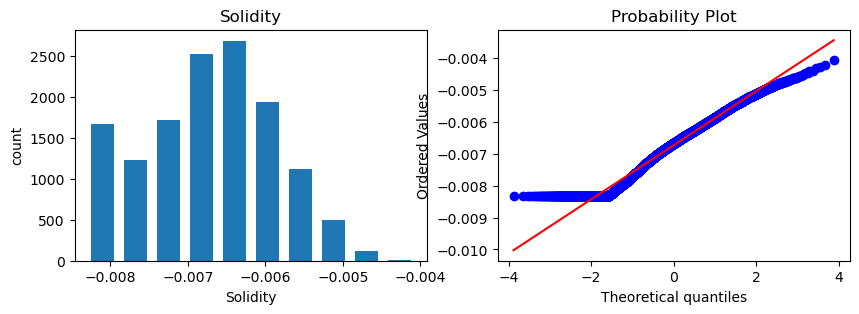

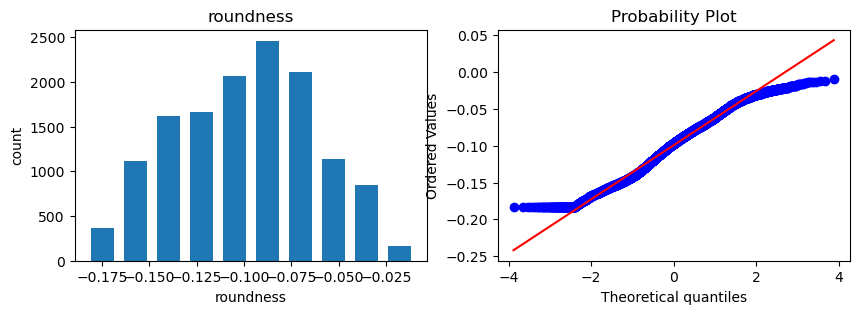

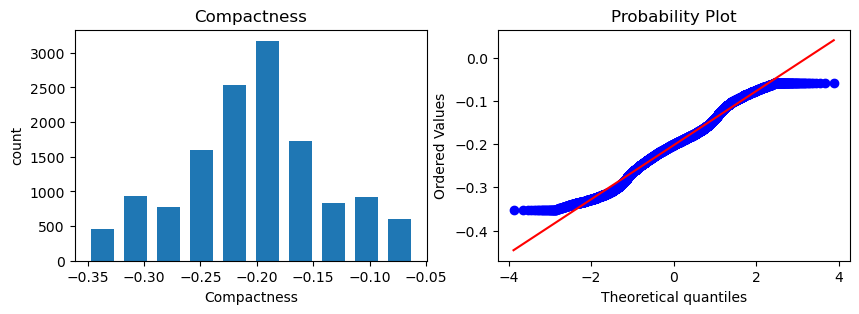

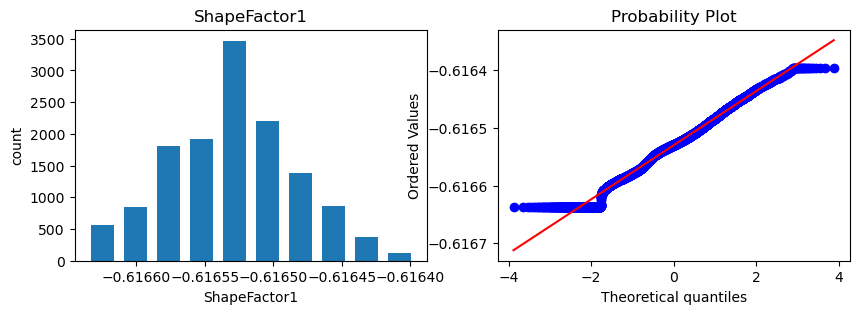

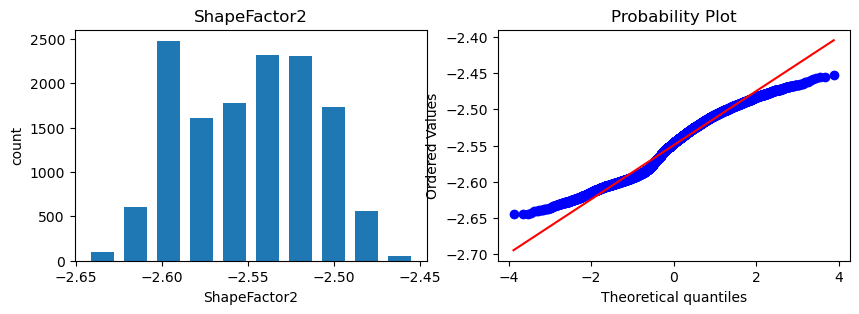

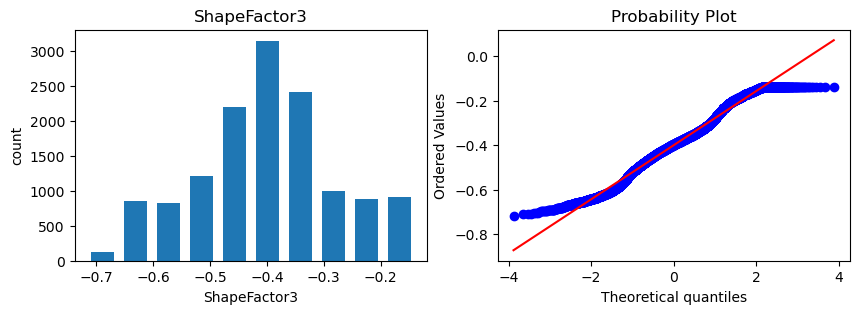

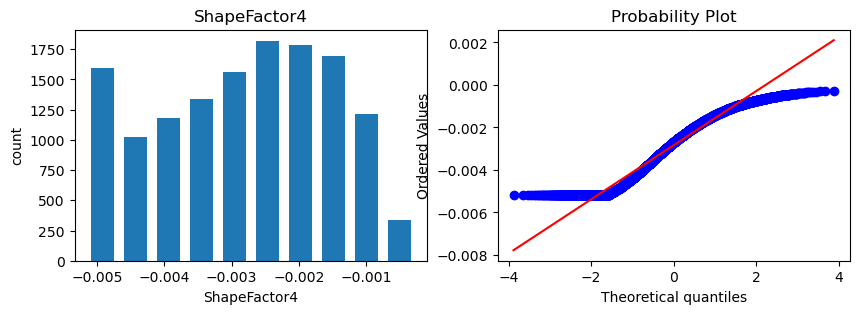

In [9]:
# applying boxcox transformation for handling skewness

for feature in numerical_features:
    data= dataset_new.copy()

    
    data[feature],transval=stat.boxcox(data[feature])
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.hist(data[feature],rwidth=0.7)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)


    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

In [9]:
for feature in numerical_features:
    dataset_new[feature],transval=stat.boxcox(dataset_new[feature])

C:\Users\anjan\AppData\Local\Temp\ipykernel_2748\3380262968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new[feature],transval=stat.boxcox(dataset_new[feature])


##### Applied boxcox transformation for reducing the skewness and used probability plot to check the data normality. Here since most of the data points are aligned along straight line indicates that the data likely follows the normal distribution.

In [10]:
dataset_new.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,2.249142,0.877678,1.008528,1.031355,0.176137,-0.26137,2.200685,0.925897,-0.134459,-0.006504,-0.039281,-0.087095,-0.616498,-2.473073,-0.173395,-0.001147,SEKER
1,2.249273,0.877707,1.008331,1.031692,0.091873,-0.26137,2.200840,0.925918,-0.128791,-0.007459,-0.094446,-0.058872,-0.616514,-2.456241,-0.137732,-0.001377,SEKER
2,2.249515,0.877693,1.008640,1.031436,0.186089,-0.26137,2.201012,0.925957,-0.130522,-0.006283,-0.048026,-0.091729,-0.616502,-2.477309,-0.182575,-0.000863,SEKER
3,2.249743,0.877715,1.008586,1.031684,0.140491,-0.26137,2.201342,0.925993,-0.129177,-0.008315,-0.082505,-0.071979,-0.616513,-2.470259,-0.143418,-0.003683,SEKER
4,2.249791,0.877689,1.008366,1.031956,0.058604,-0.26137,2.201246,0.926001,-0.131954,-0.005815,-0.014767,-0.058872,-0.616527,-2.452339,-0.137732,-0.000777,SEKER


In [13]:
# correlation between the independent features to check for multicollinearity
correlation=dataset_new[numerical_features].corr()

correlation

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.990284,0.951628,0.900169,0.429108,0.433738,0.999929,0.999460,-0.009561,-0.274564,-0.591215,-0.432890,-0.892561,-0.815740,-0.433302,-0.505622
Perimeter,0.990284,1.000000,0.973195,0.851560,0.502510,0.506938,0.991151,0.990861,-0.048382,-0.339135,-0.679117,-0.506792,-0.846129,-0.862850,-0.507233,-0.545361
MajorAxisLength,0.951628,0.973195,1.000000,0.729710,0.667442,0.670617,0.952366,0.952436,-0.089306,-0.332960,-0.732067,-0.670982,-0.725910,-0.951409,-0.671200,-0.608602
MinorAxisLength,0.900169,0.851560,0.729710,1.000000,-0.001146,0.005881,0.899121,0.901499,0.124107,-0.144109,-0.267756,-0.002908,-0.996181,-0.490955,-0.003499,-0.289381
AspectRation,0.429108,0.502510,0.667442,-0.001146,1.000000,0.996015,0.431246,0.423637,-0.275559,-0.352708,-0.801821,-0.998919,0.013725,-0.857161,-0.998618,-0.593915
Eccentricity,0.433738,0.506938,0.670617,0.005881,0.996015,1.000000,0.435940,0.428248,-0.271352,-0.362321,-0.804792,-0.996707,0.007132,-0.858535,-0.997346,-0.599461
ConvexArea,0.999929,0.991151,0.952366,0.899121,0.431246,0.435940,1.000000,0.999371,-0.011915,-0.283812,-0.596456,-0.435189,-0.891279,-0.817200,-0.435609,-0.510356
EquivDiameter,0.999460,0.990861,0.952436,0.901499,0.423637,0.428248,0.999371,1.000000,-0.006386,-0.267330,-0.583551,-0.427469,-0.896498,-0.815360,-0.427878,-0.502688
Extent,-0.009561,-0.048382,-0.089306,0.124107,-0.275559,-0.271352,-0.011915,-0.006386,1.000000,0.218432,0.279080,0.275488,-0.131455,0.164977,0.275271,0.118724
Solidity,-0.274564,-0.339135,-0.332960,-0.144109,-0.352708,-0.362321,-0.283812,-0.267330,0.218432,1.000000,0.662427,0.363344,0.113450,0.375296,0.364305,0.564777


##### Area & ConvexArea (0.9999): These two are almost perfectly correlated, suggesting that as the area increases, the convex area also increases proportionately.
##### AspectRatio & Eccentricity (0.9960): High correlation indicates that shapes with a higher aspect ratio (more elongated) also tend to have higher eccentricity (less circular).
##### AspectRatio & Compactness (-0.9989): A high aspect ratio generally implies lower compactness, suggesting elongated shapes are less compact.
##### Roundness & Perimeter (-0.6791): Shapes with higher perimeters tend to have lower roundness, likely indicating less circular shapes.
##### Extent & Area (-0.0096): There’s virtually no relationship between the extent (ratio of area to bounding box area) and the actual area.
##### Compactness & ShapeFactor1 (-0.0101): Minimal correlation between compactness and this specific shape factor.

In [11]:
#coverting the categorical feature into numerical_feature using label encoding
le_class=LabelEncoder()

dataset_new['Class_n']=le_class.fit_transform(dataset_new['Class'])


C:\Users\anjan\AppData\Local\Temp\ipykernel_2748\702500218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Class_n']=le_class.fit_transform(dataset_new['Class'])


##### Converted the categorical target variable into numerical format using label encoding.
 ##### Here we used label encoding instead of one-hot encoding because of the nature of the algorithm and the need for efficiency.

##### Algorithm Compatibility:

##### Multinomial logistic regression typically handles multiple classes as a single categorical target variable. In this approach, each unique class is treated as a single label rather than a separate binary column, which aligns with how label encoding works.
##### If one-hot encoding is used, the target variable would expand into multiple binary columns, which can lead to complications and inefficiency in algorithms that expect a single column of categorical labels as the output variable.

In [12]:
data_encoded=dataset_new.drop(['Class'],axis=1)
data_encoded.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_n
0,2.249142,0.877678,1.008528,1.031355,0.176137,-0.26137,2.200685,0.925897,-0.134459,-0.006504,-0.039281,-0.087095,-0.616498,-2.473073,-0.173395,-0.001147,5
1,2.249273,0.877707,1.008331,1.031692,0.091873,-0.26137,2.200840,0.925918,-0.128791,-0.007459,-0.094446,-0.058872,-0.616514,-2.456241,-0.137732,-0.001377,5
2,2.249515,0.877693,1.008640,1.031436,0.186089,-0.26137,2.201012,0.925957,-0.130522,-0.006283,-0.048026,-0.091729,-0.616502,-2.477309,-0.182575,-0.000863,5
3,2.249743,0.877715,1.008586,1.031684,0.140491,-0.26137,2.201342,0.925993,-0.129177,-0.008315,-0.082505,-0.071979,-0.616513,-2.470259,-0.143418,-0.003683,5
4,2.249791,0.877689,1.008366,1.031956,0.058604,-0.26137,2.201246,0.926001,-0.131954,-0.005815,-0.014767,-0.058872,-0.616527,-2.452339,-0.137732,-0.000777,5


In [15]:
# identifying the correlation between independent and target variable
corr_matrix=data_encoded.corr()['Class_n']
Correlation=abs(corr_matrix)
Correlation.sort_values(ascending=False)

Class_n            1.000000
Perimeter          0.416528
ConvexArea         0.406430
Area               0.404820
EquivDiameter      0.399103
roundness          0.392143
MajorAxisLength    0.388922
MinorAxisLength    0.375526
Solidity           0.361842
ShapeFactor1       0.352905
ShapeFactor2       0.349930
ShapeFactor4       0.208366
Eccentricity       0.161296
ShapeFactor3       0.157829
Compactness        0.157459
AspectRation       0.154532
Extent             0.024553
Name: Class_n, dtype: float64

In [16]:
data_encoded.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class_n'],
      dtype='object')

In [13]:
# seperating the dataset into independent features and target variables
X=data_encoded.drop(['Class_n'], axis=1)
X.head() 

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,2.249142,0.877678,1.008528,1.031355,0.176137,-0.26137,2.200685,0.925897,-0.134459,-0.006504,-0.039281,-0.087095,-0.616498,-2.473073,-0.173395,-0.001147
1,2.249273,0.877707,1.008331,1.031692,0.091873,-0.26137,2.200840,0.925918,-0.128791,-0.007459,-0.094446,-0.058872,-0.616514,-2.456241,-0.137732,-0.001377
2,2.249515,0.877693,1.008640,1.031436,0.186089,-0.26137,2.201012,0.925957,-0.130522,-0.006283,-0.048026,-0.091729,-0.616502,-2.477309,-0.182575,-0.000863
3,2.249743,0.877715,1.008586,1.031684,0.140491,-0.26137,2.201342,0.925993,-0.129177,-0.008315,-0.082505,-0.071979,-0.616513,-2.470259,-0.143418,-0.003683
4,2.249791,0.877689,1.008366,1.031956,0.058604,-0.26137,2.201246,0.926001,-0.131954,-0.005815,-0.014767,-0.058872,-0.616527,-2.452339,-0.137732,-0.000777


In [14]:
y=data_encoded['Class_n']
y.head()

0    5
1    5
2    5
3    5
4    5
Name: Class_n, dtype: int32

In [15]:
# converting Y y into a 1D array
y_oneD=y.to_numpy()

# checking the type of y_oned
type(y_oneD)

numpy.ndarray

##### Converted y to a 1D array since most of the model expect y as a 1D array rather than a column vector y.

In [31]:
np.unique(y_oneD)

array([0, 1, 2, 3, 4, 5, 6])

In [16]:
# spliting the data into train and test data

X_train, X_test, y_train, y_test = train_test_split(X,y_oneD,test_size=0.3,random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9480, 16), (4063, 16), (9480,), (4063,))

In [17]:
# feature scaling using minmax scaler

scaler=MinMaxScaler()

X_train_sc=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_test_sc=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_sc.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.480568,0.467574,0.506641,0.532299,0.631389,0.490765,0.478323,0.477486,0.624947,0.622718,0.582568,0.476226,0.567539,0.536479,0.514986,0.551993
1,0.867725,0.826511,0.820320,0.847249,0.759051,0.636215,0.869460,0.838567,0.426641,0.059043,0.300136,0.336166,0.246221,0.278470,0.377556,0.043216
2,0.031982,0.039433,0.076223,0.221022,0.436851,0.242817,0.031553,0.032657,0.386154,0.327115,0.684384,0.681596,0.946794,0.856507,0.717778,0.836389
3,0.706745,0.723435,0.784602,0.571158,1.000000,0.888330,0.704449,0.691315,0.000000,0.585516,0.184144,0.085379,0.522618,0.209781,0.133351,0.653473
4,0.325981,0.314451,0.353682,0.436498,0.534295,0.370434,0.324249,0.327117,0.746298,0.532203,0.680155,0.576010,0.680066,0.665525,0.613331,0.511090


In [34]:
X_test_sc.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.317840,0.310168,0.303237,0.480278,0.427373,0.230123,0.318267,0.319109,0.185264,0.326829,0.660894,0.687258,0.629054,0.741572,0.723391,0.451149
1,0.483146,0.492106,0.504262,0.542309,0.617168,0.473634,0.488040,0.479964,0.252331,0.042417,0.447315,0.488333,0.558669,0.542891,0.526899,0.369958
2,0.201797,0.195687,0.227222,0.357080,0.467206,0.283176,0.200617,0.204039,0.250739,0.441086,0.706312,0.648303,0.774436,0.765020,0.684804,0.698422
3,0.539284,0.503371,0.483696,0.662918,0.447475,0.256995,0.537416,0.533727,0.367350,0.571458,0.690886,0.670434,0.421411,0.630435,0.706719,0.841970
4,0.676266,0.647188,0.644701,0.723253,0.612406,0.467858,0.674638,0.662955,0.569543,0.503755,0.491723,0.488853,0.366394,0.456423,0.527410,0.158961


In [35]:
y_test

array([3, 6, 3, ..., 6, 1, 5])

In [36]:
# Train a multinomial logistic regression model
LR_clf=LogisticRegression(multi_class='multinomial', max_iter=1000)

LR_clf.fit(X_train_sc,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

##### Fitted a model using LogisticRegression and predicted the values using test dataset.

In [37]:
y_pred=LR_clf.predict(X_test_sc)


In [38]:
print(LR_clf.score(X_train_sc,y_train))
print(LR_clf.score(X_test_sc,y_test))

0.9241561181434599
0.9244400689145952


##### Calculated the score of both the train and test data, which shows the model is not overfitted and can perform well with unseen datasets.

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9244400689145952
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       426
           1       1.00      1.00      1.00       152
           2       0.92      0.96      0.94       442
           3       0.92      0.92      0.92      1081
           4       0.95      0.94      0.95       574
           5       0.95      0.96      0.95       614
           6       0.85      0.87      0.86       774

    accuracy                           0.92      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.92      0.92      4063



##### Accuracy: The model correctly classifies 92.4% of the samples.
##### Class-wise Performance
##### Class 0: High precision (0.97) and F1-score (0.93), with a recall of 0.89. This means most predictions for Class 0 are correct, but a few are missed.
##### Class 1: Perfect scores in all metrics (precision, recall, and F1-score of 1.00), indicating flawless identification.
##### Class 2: High recall (0.96) and F1-score (0.94), meaning most Class 2 samples are correctly identified.
##### Class 3: Balanced performance across metrics, with all scores around 0.92.
##### Class 4 and Class 5: Both classes have similar high precision and recall around 0.95, showing consistent performance.
##### Class 6: Lower precision (0.85) and recall (0.87) than other classes, suggesting this class is slightly harder for the model to identify correctly.
##### Averages
##### Macro Average: 0.94 across all metrics, showing a balanced performance across all classes.
##### Weighted Average: Close to the overall accuracy at 0.92, factoring in the number of samples in each class.
##### Summary
##### The model performs well across all classes, with particularly strong performance on Classes 1, 2, 4, and 5. Class 6 shows slightly lower scores, indicating it could be the most challenging class for the model to predict accurately.

In [40]:
#hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],                  # Regularization strength
    'solver': ['lbfgs', 'saga'],             # Solver
    'penalty': ['l2'],                       # Regularization penalty
    'multi_class': ['multinomial'],          # Multi-class strategy
    'max_iter': [100, 200, 500,1000]         # Number of iterations
}

In [41]:
# Set up GridSearchCV
grid_search = GridSearchCV(LR_clf, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train_sc, y_train)

# Best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'C': 100, 'max_iter': 500, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.9259493670886076


c:\Users\anjan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [42]:
LR_clf=LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000,C=100,penalty='l2')
LR_clf.fit(X_train_sc, y_train)


c:\Users\anjan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=100, max_iter=1000, multi_class='multinomial',
                   solver='saga')

In [43]:
y_pred=LR_clf.predict(X_test_sc)

In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9264090573467881
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       426
           1       1.00      1.00      1.00       152
           2       0.92      0.96      0.94       442
           3       0.93      0.92      0.92      1081
           4       0.96      0.94      0.95       574
           5       0.95      0.96      0.95       614
           6       0.86      0.87      0.86       774

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063



##### Performed hyperparameter tunining for the logistic regression model using Gridsearch cv method to improve performance especially for class 6 representing the SIRA class, but there is only slight difference among precision and recall could be observed.

In [42]:
# decision tree classifier
DT_clf=DecisionTreeClassifier()

In [43]:
DT_clf.fit(X_train_sc, y_train)

DecisionTreeClassifier()

In [44]:
yPred=DT_clf.predict(X_test_sc)

In [45]:
print("Accuracy:", accuracy_score(y_test, yPred))
print(classification_report(y_test, yPred))

Accuracy: 0.8929362539995077
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       426
           1       1.00      1.00      1.00       152
           2       0.88      0.94      0.91       442
           3       0.88      0.90      0.89      1081
           4       0.93      0.92      0.92       574
           5       0.94      0.91      0.92       614
           6       0.82      0.81      0.82       774

    accuracy                           0.89      4063
   macro avg       0.91      0.91      0.91      4063
weighted avg       0.89      0.89      0.89      4063



##### The accuracy is low for the decision tree classifier when compared to the logistic regressio model.

In [45]:
rnn_clf=RandomForestClassifier(n_estimators=100)
rnn_clf.fit(X_train_sc,y_train)

RandomForestClassifier()

In [46]:
Y_pred=rnn_clf.predict(X_test_sc)

In [47]:
print("Accuracy:", accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

Accuracy: 0.9205020920502092
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       426
           1       1.00      1.00      1.00       152
           2       0.91      0.95      0.93       442
           3       0.90      0.94      0.92      1081
           4       0.96      0.93      0.94       574
           5       0.95      0.95      0.95       614
           6       0.87      0.85      0.86       774

    accuracy                           0.92      4063
   macro avg       0.93      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063



In [18]:
svc_clf=SVC(kernel='rbf')
svc_clf.fit(X_train_sc,y_train)

SVC()

In [49]:
Y_Pred=svc_clf.predict(X_test_sc)

In [50]:
print("Accuracy:", accuracy_score(y_test, Y_Pred))
print(classification_report(y_test, Y_Pred))

Accuracy: 0.9291164164410534
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       426
           1       1.00      1.00      1.00       152
           2       0.93      0.96      0.95       442
           3       0.92      0.93      0.93      1081
           4       0.96      0.94      0.95       574
           5       0.96      0.95      0.95       614
           6       0.87      0.87      0.87       774

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063



In [19]:
param_grid = {
    'C': [0.1, 1, 10, 100],                    # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['rbf']                          # Use RBF kernel
}

In [20]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [21]:
# Best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.9334388185654008


In [22]:
svc_clf=SVC(C=10,gamma=1,kernel='rbf')
svc_clf.fit(X_train_sc, y_train)


SVC(C=10, gamma=1)

In [23]:
yPred=svc_clf.predict(X_test_sc)
print("Accuracy:", accuracy_score(y_test, yPred))
print(classification_report(y_test, yPred))

Accuracy: 0.9310854048732464
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       426
           1       1.00      1.00      1.00       152
           2       0.93      0.96      0.95       442
           3       0.91      0.94      0.93      1081
           4       0.97      0.93      0.95       574
           5       0.96      0.95      0.95       614
           6       0.87      0.88      0.87       774

    accuracy                           0.93      4063
   macro avg       0.95      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063



In [61]:
vc_clf=VotingClassifier(estimators=[('LogisticRegression',LR_clf),('RandomForestClassifier',rnn_clf),('SVC',svc_clf)],voting='hard')

In [62]:
vc_clf.fit(X_train_sc, y_train)

c:\Users\anjan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(C=100, max_iter=1000,
                                                 multi_class='multinomial',
                                                 solver='saga')),
                             ('RandomForestClassifier',
                              RandomForestClassifier()),
                             ('SVC', SVC(C=10, gamma=1))])

In [63]:
Y_Pred=vc_clf.predict(X_test_sc)

In [64]:
print("Accuracy:", accuracy_score(y_test, Y_Pred))
print(classification_report(y_test, Y_Pred))

Accuracy: 0.9310854048732464
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       426
           1       1.00      1.00      1.00       152
           2       0.93      0.97      0.95       442
           3       0.92      0.94      0.93      1081
           4       0.97      0.94      0.95       574
           5       0.96      0.96      0.96       614
           6       0.87      0.87      0.87       774

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063



#### Model Comparison Report
#### Introduction
##### This report provides a comparative analysis of several classification models applied to a dataset. The models evaluated include Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM) with default settings, SVM with tuned hyperparameters (C=10, gamma=1), and a Voting Classifier that combines the strengths of multiple classifiers.
#### Analysis
##### Logistic Regression:
##### Achieved an accuracy of 92.64%.
##### Strong overall performance with balanced precision and recall.

##### Decision Tree:
##### Lowest accuracy at 89.29%.
##### Shows potential for overfitting or may not generalize well.

##### Random Forest:
##### Slightly lower accuracy than Logistic Regression at 92.10%.
##### Maintains good performance metrics across different classes.

##### SVM (Default):
##### Accuracy of 92.91% with solid precision and recall metrics.
##### Effective but not the best-performing model.

##### SVM (C=10, gamma=1):
##### Best performer with an accuracy of 93.11%.
##### Excellent precision (0.95) and recall (0.94), indicating robust performance across classes.

##### Voting Classifier:
##### Achieved 93.1% accuracy, effectively combining the strengths of individual classifiers.
##### Performance metrics are strong but slightly lower than the tuned SVM.

#### Conclusion
##### Based on the comparative analysis, the Support Vector Machine (SVM) with hyperparameters C=10 and gamma=1 is recommended as the best model for this classification task. It demonstrates the highest accuracy and solid metrics for precision and recall, making it suitable for reliable predictions across different classes.










In [24]:
# Saving the model

import joblib
joblib.dump(svc_clf,'modelJoblib')

['modelJoblib']

In [25]:
mJ=joblib.load('modelJoblib')

In [26]:
# prediction using unseen data
y_predicted=mJ.predict(X_test_sc)

In [27]:
y_predicted

array([3, 6, 3, ..., 6, 1, 3])

In [30]:
#comparing the actual vs predicted values in a new df
new_df=X_test_sc.copy()

new_df['actual_class'] = pd.DataFrame(y_test)

new_df['predicted_class'] = pd.DataFrame(y_predicted)

In [31]:
new_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,actual_class,predicted_class
0,0.317840,0.310168,0.303237,0.480278,0.427373,0.230123,0.318267,0.319109,0.185264,0.326829,0.660894,0.687258,0.629054,0.741572,0.723391,0.451149,3,3
1,0.483146,0.492106,0.504262,0.542309,0.617168,0.473634,0.488040,0.479964,0.252331,0.042417,0.447315,0.488333,0.558669,0.542891,0.526899,0.369958,6,6
2,0.201797,0.195687,0.227222,0.357080,0.467206,0.283176,0.200617,0.204039,0.250739,0.441086,0.706312,0.648303,0.774436,0.765020,0.684804,0.698422,3,3
3,0.539284,0.503371,0.483696,0.662918,0.447475,0.256995,0.537416,0.533727,0.367350,0.571458,0.690886,0.670434,0.421411,0.630435,0.706719,0.841970,5,5
4,0.676266,0.647188,0.644701,0.723253,0.612406,0.467858,0.674638,0.662955,0.569543,0.503755,0.491723,0.488853,0.366394,0.456423,0.527410,0.158961,6,6


In [32]:
new_df.sample(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,actual_class,predicted_class
3255,0.735726,0.749379,0.784751,0.643041,0.947571,0.822042,0.735796,0.718143,0.000000,0.276386,0.165717,0.148048,0.456438,0.233358,0.194142,0.003136,4,4
2225,0.249074,0.242975,0.273552,0.387388,0.489403,0.312367,0.246747,0.251126,0.268137,0.572924,0.686195,0.626757,0.735050,0.731022,0.663482,0.889358,3,3
1726,0.444313,0.432770,0.458519,0.526327,0.572588,0.418807,0.444456,0.442513,0.155472,0.354504,0.602061,0.535774,0.575391,0.589338,0.573633,0.471786,3,3
1659,0.573657,0.610494,0.668814,0.489890,0.914192,0.791684,0.575065,0.566419,0.073448,0.226054,0.224489,0.187322,0.622358,0.322337,0.232320,0.213105,4,4
3445,0.582542,0.551379,0.517887,0.704524,0.443131,0.251204,0.583162,0.574842,0.346642,0.289176,0.613099,0.668594,0.382863,0.608706,0.704896,0.326735,6,6
2661,0.962691,0.897679,0.877528,0.947780,0.728157,0.602435,0.966339,0.923306,0.499723,0.000000,0.301122,0.362867,0.156172,0.245344,0.403699,0.000000,2,2
2358,0.737380,0.704410,0.652950,0.818242,0.497564,0.323024,0.739200,0.719670,0.222828,0.130717,0.439686,0.613239,0.267871,0.499491,0.650115,0.433283,0,0
1240,0.268184,0.303746,0.377965,0.297783,0.697884,0.568442,0.270308,0.270079,0.109581,0.204862,0.453746,0.407972,0.851705,0.579504,0.447922,0.518419,3,3
2313,0.834857,0.788327,0.769068,0.860999,0.640736,0.501927,0.840674,0.808860,0.335193,0.000000,0.392327,0.447907,0.238260,0.356403,0.487140,0.000000,2,2
2688,0.304421,0.315693,0.346562,0.404213,0.558438,0.401064,0.305819,0.305891,0.382518,0.253653,0.558625,0.552498,0.717218,0.659214,0.590127,0.645011,3,3


##### Here it is visible that model created using svc is a more robust, generalized model and also perform well with the new unseen data.

In [37]:
# Access the original class labels from the encoded values
original_labels = le_class.inverse_transform(y_oneD)

print("Encoded labels:", np.unique(y_oneD))
print("Original labels:", np.unique(original_labels))

Encoded labels: [0 1 2 3 4 5 6]
Original labels: ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
